In [1]:
import numpy as np
import pandas as pd
import lxml.html as lx
import nltk.corpus as corpus
from nltk.corpus import wordnet
import requests
import requests_cache
import re
import nltk
%matplotlib inline

# Create cache to store result
requests_cache.install_cache("HW4_cache")

In [2]:
def get_url(url):
    """This function takes in a url from an article list of The San Francisco Chronicle (must be in string format) 
    and returns the correponding urls that are linked to the articles of the list. Input of invalid url will result
    in the function returning a message ot warn the user.
    
    Error code:
    1 -> The input is not in the format of url
    2 -> Provided url gives no feedback"""

    # get and check response
    response = requests.get(url)
    response.raise_for_status()

    # parse the html
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    
    # get url, convert to string, and eliminate duplication
    article_href_all = html.xpath("//a[contains(@href, '/article')]/@href")
    article_href_all = [str(ele) for ele in article_href_all]
    article_href_all = list(set(article_href_all))
    
    return(article_href_all)

In [3]:
# Test case 1: local
get_url("https://www.sfchronicle.com/local/")

['https://www.sfchronicle.com/crime/article/Union-City-high-school-locked-down-after-student-13637434.php',
 'https://www.sfchronicle.com/bayarea/article/Judge-dismisses-SF-suit-over-Trump-administration-13635459.php',
 'https://www.sfchronicle.com/bayarea/heatherknight/article/A-glimmer-of-hope-for-mental-health-services-in-SF-13608554.php',
 'https://www.sfchronicle.com/bayarea/article/Mother-s-Day-fire-separates-mom-disabled-son-13476165.php',
 'https://www.sfchronicle.com/politics/article/Bay-Area-political-events-Fire-resiliency-town-13627892.php',
 'https://www.sfchronicle.com/california-wildfires/article/As-terror-of-wildfire-fades-survivors-face-new-13279744.php',
 'https://www.sfchronicle.com/bayarea/article/Hardworking-mom-had-never-sought-help-but-13451249.php',
 'https://www.sfchronicle.com/bayarea/article/Lisa-Johnson-had-lived-in-her-beloved-house-her-13485755.php',
 'https://www.sfchronicle.com/crime/article/Prosthetic-leg-swiped-in-San-Francisco-car-13627880.php',
 'htt

In [4]:
# Test case 2: Biz+Tech
get_url("https://www.sfchronicle.com/business/")

['https://www.sfchronicle.com/news/world/article/Stocks-head-lower-threatening-to-break-a-winning-13633615.php',
 'https://www.sfchronicle.com/realestate/article/Designer-Profile-Lowell-Strauss-of-Amalfi-West-13620501.php',
 'https://www.sfchronicle.com/business/article/Trump-administration-begins-effort-to-strip-work-13634442.php',
 'https://www.sfchronicle.com/business/article/The-Hound-Gentlemen-s-Clothiers-finds-buyer-on-13635174.php',
 'https://www.sfchronicle.com/business/article/Lyft-sets-early-April-for-its-IPO-13634770.php',
 'https://www.sfchronicle.com/realestate/article/15-years-and-a-luxe-remodel-add-2-755M-to-13608204.php',
 'https://www.sfchronicle.com/business/networth/article/Newsom-wants-to-expand-programs-that-open-a-13638549.php',
 'https://www.sfchronicle.com/business/article/Ship-traffic-February-25-13637261.php',
 'https://www.sfchronicle.com/news/article/US-stocks-rise-in-early-trading-on-mixed-company-13636636.php',
 'https://www.sfchronicle.com/business/articl

In [5]:
# Test case 3: us&world
get_url("https://www.sfchronicle.com/us-world/")

['https://www.sfchronicle.com/news/education/article/Impatient-NY-motorist-nearly-mows-down-13639215.php',
 'https://www.sfchronicle.com/news/world/article/The-Latest-Hundreds-camp-overnight-to-help-aid-13639029.php',
 'https://www.sfchronicle.com/news/article/Revolutionary-War-fighting-ended-but-shots-13637894.php',
 'https://www.sfchronicle.com/entertainment/television/article/The-Latest-Empire-actor-turns-self-in-to-face-13633087.php',
 'https://www.sfchronicle.com/news/article/Canada-s-energy-regulator-endorses-contentious-13637060.php',
 'https://www.sfchronicle.com/news/world/article/Aid-showdown-Venezuela-opposition-prepares-to-13639010.php',
 'https://www.sfchronicle.com/news/education/article/Sen-Feinstein-debates-children-over-climate-13639406.php',
 'https://www.sfchronicle.com/politics/article/Feinstein-goes-toe-to-toe-with-Green-New-Deal-13638416.php',
 'https://www.sfchronicle.com/politics/article/California-Gov-Gavin-Newsom-puts-distance-13638356.php',
 'https://www.sfch

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

In [132]:
# functions used to get the summary
# acquired summary includes
# article title, article text, author, date where the article is posted, and date where the article is updated

def get_title(html):  
    '''This function is used to get the title of an article, the input should be the url of the article 
    in string format. Articles with no title will assign None to the title'''
    
    title = html.xpath("//h1[contains(@class, 'header-title')]|//h2[contains(@class, 'header-title')]|//div[contains(@class, 'article-title')]/h1[contains(@class, 'headline entry-title')]|//div[contains(@class, 'article-head')]/h2[contains(@class, 'headline')]")

    if len(title): 
        title = title[0].text_content()
    else:
        title = None
    return(title)

In [133]:
# functions to get text
def get_text(html):
    '''This function is used to get the text of an article, the input should be the url of the article 
    in string format. Articles with no text will assign None to the text'''
    
    text = html.xpath("//section[contains(@class, 'body')]//p|//div[contains(@class, 'article-body')]/p|//div[contains(@class, 'article-text')]/p")
    
    if len(text): 
        text = ' \n\n '.join(line.text_content() for line in text)
    else:
        text = None
    return(text)

In [134]:
# function to get author
def get_author(html):
    '''This function is used to get the author of an article, the input should be the url of the article 
    in string format. Articles with no author will assign None to the author'''
    
    author = html.xpath("//span[contains(@class, 'header-authors-name')]|//p[contains(@class, 'byline')]/a|//span[contains(@class, 'header-byline')]")
    
    if len(author): 
        author = author[0].text_content()
        author = author.strip() 
        author = re.sub(r'^By |,[\s\w]+|[\n\s]+', ' ', author)
        author = re.sub(r'\s+and\s+', ', ', author)
        if not len(author):
            author = None   
    else:
        author = None
    return(author)

In [135]:
# function to get post time
def get_date(html):
    '''This function is used to get the posted time of an article, the input should be the url of the article 
    in string format. Articles with no posted time will assign None to the posted time'''
    
    time = html.xpath("//time[contains(@itemprop, 'datePublished')]/@datetime|//meta[contains(@name, 'article:published_time')]/@content")
    
    if len(time): 
        time = time[0]
    else:
        time = None
    return(time)

In [136]:
# function to get updated time
def get_date_updated(html):
    '''This function is used to get the updated time of an article, the input should be the url of the article 
    in string format. Articles with no updated time will assign None to the updated time'''
    
    time_updated = html.xpath("//time[contains(@itemprop, 'dateModified')]/@datetime|//meta[contains(@name, 'article:modified_time')]/@content|//span[contains(@class, 'updated updated')]")
    if len(time_updated): 
        time_updated = time_updated[0]
    else:
        time_updated = None
    return(time_updated)

In [137]:
# the function has several section for title, text, author, etc.

def get_summary(url):
    """This function takes in a url to the article and output the url, title, 
    body text, author, date, and updated date that are organized into a dictionary. The 
    input of the url should be in string format."""
    
    # get response
    response = requests.get(url)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    
    # gether all information
    title = get_title(html)
    text = get_text(html)
    author = get_author(html)
    time = get_date(html)
    time_updated = get_date_updated(html)
    
    
    return({"url": url,
               "title": title,
               "text": text,
               "author": author,
               "date": time,
               "date_updated": time_updated})

In [138]:
# text case
get_summary('https://www.sfchronicle.com/entertainment/television/article/Empire-actor-goes-from-victim-to-accused-felon-13632612.php')

{'url': 'https://www.sfchronicle.com/entertainment/television/article/Empire-actor-goes-from-victim-to-accused-felon-13632612.php',
 'title': 'Correction: Empire Cast Member-Attack story',
 'text': 'CHICAGO (AP) — In one version of a Feb. 21 story about "Empire" actor Jussie Smollett being charged with staging an attack on himself in Chicago, The Associated Press erroneously referred to police Superintendent Eddie Johnson speaking at a Thursday afternoon news conference. The news conference happened Thursday morning. \n\n A corrected version of the story is below: \n\n Case against Jussie Smollett resembles detailed movie script \n\n Prosecution\'s case against Jussie Smollett resembles detailed movie script \n\n By DON BABWIN \n\n Associated Press \n\n CHICAGO (AP) — As authorities laid out their case against "Empire" actor Jussie Smollett, the narrative that emerged Thursday sounded like that of a filmmaker who wrote, cast, directed and starred in a short movie. \n\n Prosecutors said

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [69]:
# Function to convert summary into a dataframe
def summary_data(url):
    '''This function is used to convert that dictionary result from get_summary function to a dataframe.
    All data types for the dataset are strings except date and date_updated columns, in which data are 
    stored as datetime type.'''
    
    url_content = get_url(url)
    category = (url).rsplit('/', 2)[-2]
    posts_content = [get_summary(url) for url in url_content]
    posts_data = pd.DataFrame(posts_content)
    posts_data.loc[:,'category'] = category
    posts_data.loc[:,'date'] = pd.to_datetime(posts_data.loc[:,'date'])
    posts_data.loc[:,'date_updated'] = pd.to_datetime(posts_data.loc[:,'date_updated'])
    return(posts_data)

In [117]:
buisness_data = summary_data("https://www.sfchronicle.com/business/")
buisness_data

,author,date,date_updated,text,title,url,category
0,YURI KAGEYAMA,2019-02-22 02:11:41+00:00,2019-02-22 02:22:04+00:00,TOKYO (AP) — Asian shares were mostly lower Fr...,Asian shares mostly lower as investors watch t...,https://www.sfchronicle.com/news/world/article...,business
1,Jordan Guinn,2019-02-16 17:17:19+00:00,2019-02-16 17:18:29+00:00,Despite his penchant for building multimillion...,Designer Profile: Lowell Strauss of Amalfi West,https://www.sfchronicle.com/realestate/article...,business
2,Tal Kopan,2019-02-22 02:04:26+00:00,2019-02-22 02:05:15+00:00,"WASHINGTON — After nearly two years of delays,...",Trump administration begins effort to strip wo...,https://www.sfchronicle.com/business/article/T...,business
3,Shwanika Narayan,2019-02-22 12:00:00+00:00,2019-02-22 12:00:34+00:00,One of San Francisco’s last traditional men’s ...,The Hound Gentlemen’s Clothiers finds buyer on...,https://www.sfchronicle.com/business/article/T...,business
4,"Mike Isaac, Kate Conger",2019-02-21 21:35:35+00:00,NaT,In a rush to beat its rival Uber to the public...,Lyft sets early April for its IPO,https://www.sfchronicle.com/business/article/L...,business
5,Anna Marie Erwert,2019-02-21 12:03:33+00:00,2019-02-21 13:18:46+00:00,"In 2001, this Russian Hill home sold for $740,...",15 years and a luxe remodel add $2.755M to Rus...,https://www.sfchronicle.com/realestate/article...,business
6,Kathleen Pender,2019-02-23 12:00:00+00:00,2019-02-23 12:00:29+00:00,Gov. Gavin Newsom has proposed spending $50 mi...,Newsom wants to expand programs that open a sa...,https://www.sfchronicle.com/business/networth/...,business
7,San Francisco Marine Exchange,2019-02-22 18:46:23+00:00,NaT,Ship traffic \n\n Due to arrive today \n\n SHI...,"Ship traffic, February 25",https://www.sfchronicle.com/business/article/S...,business
8,ALEX VEIGA,2019-02-22 22:05:21+00:00,2019-02-22 22:24:56+00:00,Technology and health care companies led U.S. ...,"Stocks climb, giving S&P 500 its 4th straight ...",https://www.sfchronicle.com/news/article/US-st...,business
9,Chabeli Herrera,2019-02-20 23:24:19+00:00,NaT,Israel is heading to the moon. \n\n And if it’...,SpaceX will send Israel lander to the moon,https://www.sfchronicle.com/business/article/S...,business


In [120]:
len(buisness_data)

28

In [118]:
food_data = summary_data("https://www.sfchronicle.com/food/")
food_data

,author,date,date_updated,text,title,url,category
0,Jessica Battilana,2018-07-09 17:38:33+00:00,2018-07-10 16:53:22+00:00,Lately I’ve been evangelizing about my new coo...,Repertoire: Apricot toast is the summer grilli...,https://www.sfchronicle.com/recipes/article/Re...,food
1,Joe Eskenazi,2017-07-16 22:26:21+00:00,2017-07-18 19:06:23+00:00,Greeting visitors to the Budweiser brewery and...,Is this Bud tasting room for you?,https://www.sfchronicle.com/news/article/Is-th...,food
2,Melissa Hung,2018-01-03 15:00:00+00:00,2019-02-01 17:59:15+00:00,"When Pattar Dilmurat left Dubai, where he live...","‘They don’t know us’: At Sama Uyghur Cuisine, ...",https://www.sfchronicle.com/food/article/They-...,food
3,Jessica Battilana,2018-05-02 18:26:09+00:00,2018-05-02 18:39:06+00:00,To develop a cooking repertoire you have to be...,Repertoire: Asparagus With Walnut Crema and Fr...,https://www.sfchronicle.com/recipes/article/Re...,food
4,Paolo Lucchesi,2017-10-06 17:54:33+00:00,2017-10-06 18:14:33+00:00,\n\n Welcome to the 2017 edition of Bargain ...,The best meals in the Bayview for under $20,https://www.sfchronicle.com/food/article/The-b...,food
5,Nik Sharma,2019-02-01 19:06:18+00:00,2019-02-01 19:07:47+00:00,Stock recipes are personal. A stock in many wa...,A Brown Kitchen: A thousand stories in a pot o...,https://www.sfchronicle.com/recipes/article/A-...,food
6,Earl Nickel,2019-01-11 20:21:19+00:00,NaT,We’re all familiar with the brightly colored v...,Woodland violas make a magic carpet of perenni...,https://www.sfchronicle.com/homeandgarden/arti...,food
7,Sarah Fritsche,2019-02-14 18:51:24+00:00,2019-02-14 18:52:21+00:00,According to London author Yasmin Khan (“The S...,In conversation: Reem Assil and Yasmin Khan on...,https://www.sfchronicle.com/food/article/In-co...,food
8,Sarah Fritsche,2017-06-28 18:25:55+00:00,2017-06-28 20:16:43+00:00,Elizabeth Simon had no intention of starting a...,San Francisco pie maker’s sweet revenge,https://www.sfchronicle.com/news/article/San-F...,food
9,Esther Mobley,2018-01-05 21:59:46+00:00,2018-01-05 22:00:50+00:00,"With To Kalon, it’s never over. \n\n Located i...",The battle over To Kalon continues as Constell...,https://www.sfchronicle.com/wine/article/The-b...,food


In [121]:
len(food_data)

129

In [119]:
sports_data = summary_data("https://www.sfchronicle.com/sports/")
sports_data

,author,date,date_updated,text,title,url,category
0,Eric Branch,2018-12-23 12:00:00+00:00,2018-12-27 23:14:09+00:00,"Last year, after he was hired despite having z...",49ers’ GM John Lynch will be the one to watch ...,https://www.sfchronicle.com/49ers/article/49er...,sports
1,Al Saracevic,2019-02-23 05:42:08+00:00,2019-02-23 05:43:48+00:00,"SCOTTSDALE, Ariz. — On a team rife with questi...",Will Steven Duggar be the Giants’ everyday cen...,https://www.sfchronicle.com/giants/article/Wil...,sports
2,Associated Press,2019-02-17 07:05:16+00:00,2019-02-17 07:06:13+00:00,No. 5 Kentucky got the strong start it sought ...,Kentucky knocks off top-ranked Tennessee,https://www.sfchronicle.com/collegesports/arti...,sports
3,Eric Branch,2019-02-21 20:03:12+00:00,NaT,How can George Kittle improve on his record-br...,How can 49ers TE George Kittle improve? Kyle S...,https://www.sfchronicle.com/49ers/article/How-...,sports
4,Rusty Simmons,2018-12-24 12:00:00+00:00,2018-12-31 09:08:00+00:00,Cal head women’s basketball coach Lindsay Gott...,Cal chancellor Carol Christ looks to unify aca...,https://www.sfchronicle.com/collegesports/arti...,sports
5,Matt Kawahara,2019-02-13 03:53:40+00:00,2019-02-13 03:54:26+00:00,A potential solution reportedly has emerged la...,"Raiders’ 2019 stadium search: Birmingham, Tucs...",https://www.sfchronicle.com/raiders/article/Ra...,sports
6,Tom FitzGerald,2019-02-22 04:45:52+00:00,2019-02-22 04:47:11+00:00,Something is bothering Tara VanDerveer. The St...,Stanford’s Tara VanDerveer says Alanna Smith g...,https://www.sfchronicle.com/collegesports/arti...,sports
7,Ron Kroichick,2018-12-26 12:00:00+00:00,2018-12-31 09:03:46+00:00,"Warriors guard Stephen Curry, a certified golf...",Cameron Champ brings the long ball to golf,https://www.sfchronicle.com/sports/golf/articl...,sports
8,Matt Kawahara,2019-02-15 02:34:54+00:00,2019-02-15 02:35:49+00:00,The Raiders are adding experience to their off...,Raiders announce 5 additions to coaching staff,https://www.sfchronicle.com/raiders/article/Ra...,sports
9,Connor Letourneau,2019-02-22 17:22:06+00:00,2019-02-22 17:22:59+00:00,Former Warriors swingman Stephen Jackson is pl...,Stephen Jackson says some NBA players lack a l...,https://www.sfchronicle.com/warriors/article/S...,sports


In [122]:
len(sports_data)

90

In [112]:
# combine all data and reset index and convert date to date type
all_articles = pd.concat([buisness_data, sports_data, food_data])
all_articles = all_articles.reset_index().drop('index', 1)
all_articles.loc[:,'date'] = pd.to_datetime(all_articles.loc[:,'date'])
all_articles.loc[:,'date_updated'] = pd.to_datetime(all_articles.loc[:,'date_updated'])

In [123]:
all_articles

,author,date,date_updated,text,title,url,category
0,YURI KAGEYAMA,2019-02-22 02:11:41+00:00,2019-02-22 02:22:04+00:00,TOKYO (AP) — Asian shares were mostly lower Fr...,Asian shares mostly lower as investors watch t...,https://www.sfchronicle.com/news/world/article...,business
1,Jordan Guinn,2019-02-16 17:17:19+00:00,2019-02-16 17:18:29+00:00,Despite his penchant for building multimillion...,Designer Profile: Lowell Strauss of Amalfi West,https://www.sfchronicle.com/realestate/article...,business
2,Tal Kopan,2019-02-22 02:04:26+00:00,2019-02-22 02:05:15+00:00,"WASHINGTON — After nearly two years of delays,...",Trump administration begins effort to strip wo...,https://www.sfchronicle.com/business/article/T...,business
3,Shwanika Narayan,2019-02-22 12:00:00+00:00,2019-02-22 12:00:34+00:00,One of San Francisco’s last traditional men’s ...,The Hound Gentlemen’s Clothiers finds buyer on...,https://www.sfchronicle.com/business/article/T...,business
4,"Mike Isaac, Kate Conger",2019-02-21 21:35:35+00:00,NaT,In a rush to beat its rival Uber to the public...,Lyft sets early April for its IPO,https://www.sfchronicle.com/business/article/L...,business
5,Anna Marie Erwert,2019-02-21 12:03:33+00:00,2019-02-21 13:18:46+00:00,"In 2001, this Russian Hill home sold for $740,...",15 years and a luxe remodel add $2.755M to Rus...,https://www.sfchronicle.com/realestate/article...,business
6,Kathleen Pender,2019-02-23 12:00:00+00:00,2019-02-23 12:00:29+00:00,Gov. Gavin Newsom has proposed spending $50 mi...,Newsom wants to expand programs that open a sa...,https://www.sfchronicle.com/business/networth/...,business
7,San Francisco Marine Exchange,2019-02-22 18:46:23+00:00,NaT,Ship traffic \n\n Due to arrive today \n\n SHI...,"Ship traffic, February 25",https://www.sfchronicle.com/business/article/S...,business
8,ALEX VEIGA,2019-02-22 22:05:21+00:00,2019-02-22 22:24:56+00:00,Technology and health care companies led U.S. ...,"Stocks climb, giving S&P 500 its 4th straight ...",https://www.sfchronicle.com/news/article/US-st...,business
9,Chabeli Herrera,2019-02-20 23:24:19+00:00,NaT,Israel is heading to the moon. \n\n And if it’...,SpaceX will send Israel lander to the moon,https://www.sfchronicle.com/business/article/S...,business


In [113]:
len(all_articles)

247

__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

In [41]:
# The following function for converting POS tags is acquired from Nick Ulle's STA 141B Github Repo Lecture note 2.14
# URL: https://github.com/2019-winter-ucdavis-sta141b/notes/blob/master/lecture/02.14/notes.ipynb
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [107]:
# function to combine articles in a specific category together and get the word frequency
def get_freq(dataset):
    '''This funtion takes in a dataset that is generated from the summary_data function. It will
    frist use natural language processing tools from nltk to clean the text first: including convert
    all texts to lower case, tokenize the words, and lemmatize all the words to increase accuracy of the result.
    The output of the function is the frequency list of all the articles in a dataframe.'''
    
    all_text = ' '.join(text for text in dataset.loc[:,'text'])
    all_text = nltk.word_tokenize(all_text.lower())
    
    lemmatizer = nltk.WordNetLemmatizer()
    all_tags = nltk.pos_tag(all_text)
    all_text = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in all_tags]
    
    extra_stopwords = ['say', 'san', 'francisco', 'people', 'would', 'california', 'going', 
                       'back', 'two', 'get', 'like', 'game','play','year','point','team',
                       'go','one','first', 'last', 'think', 'second', 'also', 'go', 'last', 
                       'take', 'make', 'come', 'good', 'see', 'want', 'add', 'use', "1", 'still',
                      'bay']
    
    stopwords = corpus.stopwords.words('english') + extra_stopwords

    all_text = [w for w in all_text if w not in stopwords]
    all_text_freq = nltk.FreqDist(w for w in all_text if w.isalnum())
    return(all_text_freq)

In [100]:
# functon to plot frequency of words
def get_word_summary(data, n = 20):
    '''This function takes in a dataset and return its frequency plot on words and the list of words that 
    only appeared once in the category. In addition, user can also specify the number of most frequent words
    to plot. By default, the plot will plot the top 20 most common word. 
    Note: the result has been modified by natrual language processing tool nltk'''
    
    freq_data = get_freq(data)
    freq_plot = freq_data.plot(n, cumulative = False)
    freq_unique = freq_data.hapaxes()
    return(freq_plot, freq_unique)

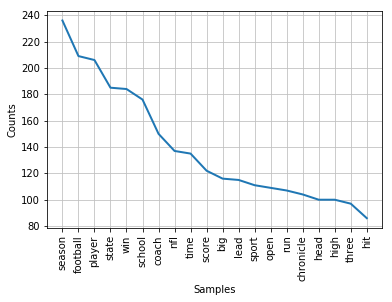

(None,
 ['nontraditional',
  'fox',
  'broadcast',
  'booth',
  'comfort',
  'restless',
  'finalist',
  'opportune',
  'complaint',
  'regime',
  'disastrous',
  'reuben',
  'ahkello',
  'arrest',
  'jimmy',
  'garoppolo',
  'mullens',
  'uglier',
  'millen',
  'mcglinchey',
  'dante',
  'pettis',
  'misgiving',
  'convinced',
  'finesse',
  'reversed',
  'resurface',
  'transparency',
  'stark',
  'predecessor',
  'baalke',
  'transparent',
  'momentary',
  'replicate',
  'rife',
  'delivers',
  'onto',
  'unfortunate',
  'baserunning',
  'cue',
  'labrum',
  'unpack',
  'proceed',
  'calendar',
  'hensley',
  'finley',
  'hopefullys',
  'fruition',
  'mccutchen',
  'cutch',
  'craw',
  'roomful',
  'pablo',
  'sandoval',
  'hp',
  'penny',
  'solidify',
  'hedge',
  'studying',
  '141',
  'string',
  'chorus',
  'inexperienced',
  'motivate',
  'failure',
  'keldon',
  'cushion',
  'breakdown',
  'phase',
  'encouraging',
  '94',
  'torero',
  '16th',
  'perkins',
  '52',
  'iggy',


In [101]:
get_word_summary(sports_data)

__Topics From Sports Articles__

From the frequency plot of the sports article, we can see that the word "football" and "NFL" are both among the 20 frequent words of all sports articles. Therefore, it gives us a very clear clue that there are a lot of articles mentioned the sport "football" as well as its professional league "NFL". In addition, the word "three" is among the 20 most frequent word appeared in sports articles. Although there are many fields in sports that could be related to the word "three", basketball is certainly the most relevant sports and the frequent appearance of the word "three" indicates that there might be a lot of articles on basketball. Besides, we can also see that there are words such as "state", "school", "high", which indicates that there are many articles that mentioned high school or college sports. From other words like "win", "coach", "lead", we can also see that there are many analysis or summaries of sports like basketball in the article.

From the list of words that only appeared in sports articles once, we can see a wide variety of words and most of these words are more specific and give us a better clue of what might be mentioned once in all of the articles. For instance, the word "rebound" is closely related to basketball articles and the word "arrest", which seems awkward to appear in sports articles, may suggest that some athlete may have run into trouble off the court. 

Overall, we can see that the focus point of sports articles in SF chronicle these days is football. However, since we only have about 90 articles that are published roughly in the same week, which is very biased as the news coverage is easily influenced by big events like a competitive game between two teams or other new like the recent injury of Duke basketball player Zion Williams. Therefore, the above conclusion drawn from articles that are published almost on the same day is not very representative. 

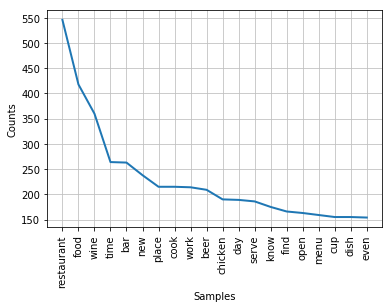

(None,
 ['evangelize',
  'leaning',
  'wring',
  'neighboring',
  'farmland',
  'lavishly',
  'peas',
  'whipped',
  'halved',
  'nectarine',
  'stiffer',
  'described',
  'depending',
  'stagger',
  'searing',
  'unsubtly',
  'multinational',
  'conglomerate',
  'rig',
  'spur',
  'indicates',
  'et',
  'transportation',
  'narrator',
  '56',
  '1913',
  'adolphus',
  'uniform',
  'punctiliousness',
  'homer',
  'bangor',
  'maine',
  'dogfish',
  'calagione',
  'yorker',
  'consolidation',
  'arms',
  'resultant',
  'gamely',
  'nascar',
  'apropos',
  'fastidiously',
  'dingy',
  'paddy',
  'philadelphia',
  'millennial',
  'cotton',
  'alacrity',
  'binge',
  'winning',
  'odd',
  'tutorial',
  'cidre',
  'syrupy',
  'artois',
  'leffe',
  'goose',
  'jarringly',
  'proffer',
  'careen',
  'neat',
  'metaphorical',
  'collision',
  'ponder',
  'jennivive',
  'beermaster',
  'vast',
  'pail',
  'jimmy',
  'jelly',
  'growler',
  'vallejo',
  'painstakingly',
  'disappointed',
  'low

In [108]:
get_word_summary(food_data)

__Topics from Food Article__

From the frequency plot of the 20 words that appeared the most frequently in articles in the food category, we can see, as expected, the words "restaurant" and "food" are the two most frequent word, which indicates that many food restaurants probably talk about food of a specific restaurant instead of just talking about a certain food. In addition, words like "wine", "bar", "beer" indicate that there are probably many articles talking about alcohol drinks, which makes sense as California produces some of the finest wine in the US. The word "chicken" indicates that there are many articles talking about food or dishes that are made with chicken. Besides, the work like "place", "new", "work" suggest that there are probably many articles about new restaurants.

From the list of words that only appeared in the food articles onece, we can see that these are mostly words that describe a specific type of food such as "nectarine" or "chow mein", which indicates that there are probably many articles about a specific type of food. 

The limitation of the conclusion mentioned for sports article is also applicable in food article. Since the articles are gethered today and most of them are posted in this week, it is very likely that it is biased and cannot reflect whay SF chronicle generally covers in the food category. Therefore, it would be better to conduct this analysis multiple times through a larger time interval to get a more accurate result.


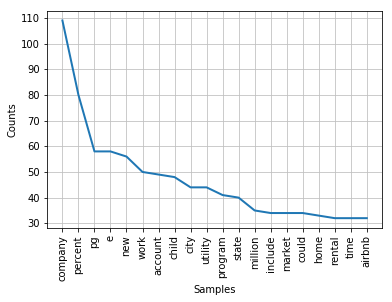

(None,
 ['nervously',
  'watch',
  'slip',
  'morning',
  'lower',
  'slowdown',
  'labor',
  'unemployment',
  'encouraging',
  'layoff',
  'cautious',
  'weakness',
  'weaken',
  'penchant',
  'dream',
  'profile',
  'amalfi',
  'west',
  'sidestep',
  'architect',
  'truth',
  'holistic',
  'hail',
  'waterloo',
  'toronto',
  'construction',
  'builder',
  'multitalented',
  'complement',
  'margarita',
  'rafael',
  'woodside',
  'ross',
  '460',
  'ridge',
  'pier',
  'golden',
  'gate',
  'retreat',
  'philosophy',
  'interaction',
  'anishinaabe',
  'ojibwe',
  'spent',
  'deep',
  'wilderness',
  'tent',
  'native',
  'otherworldly',
  'contentedness',
  'sound',
  'ridiculous',
  'inspire',
  'hurdle',
  'advancement',
  'fundamentally',
  'setting',
  'selective',
  'apart',
  'expansive',
  'outdoor',
  'unfriendly',
  'neighbor',
  'passionate',
  'yes',
  'imagine',
  'integral',
  'speaks',
  'art',
  'particular',
  'special',
  'steel',
  'concrete',
  'fossilized',
  

In [79]:
get_word_summary(buisness_data)

__Topics from Business Articles__

From the frequency plot of words from business articles, we can see, as expected, the word "company" is the most common word, which indicates that many articles talk about news that is related to companies. One interesting finding is that the word "pg" and "e" are the third and fourth most frequent word in business articles and they are at roughly the same frequency according to the plot, which makes me think of the company "PG&E". By checking the business articles in SF Chronicle that talked about PG&E, it turns out that PG&E is facing bankruptcy, which created many conflicts between the leadership and the workers. In addition, my further researching, it turns out that the headquarter of PG&E is located in San Francisco, which explains why there is such a large coverage of news from PG&E from the SF Chronicle. y further investigation, I suspect that the high frequency of the word "million" is also caused by the large number of news on PG&E since many articles mentioned the word "million" repeatedly. In addition, the word "program" appeared a lot, which implies that there are many articles about the IT industry or talking about intern programs offered by companies. Besides, the frequency count for "rental", "market", "Airbnb" are pretty high, which indicates that there are also some articles talking about the rental market and, specifically, the rental company Airbnb.

From the list for words that only appeared in the business articles once, we can see that there are articles that covered specific topics like "unemployment", "JPMorgan". We can also see a diversified perspective of business news articles from the list of unique words and many of them describe geographical location like "Waterloo" or "Toronto". On the other hand, there are also many words that describe the spiritual quality like "faithfully", "delegation", and "integrity".

Last but not the least, from the high coverage of news from PG&E, we can prove that the limitation mentioned in the result of sports article is actually reasonable-- as an intrinsic property of news, it will be highly  influenced by major events, especially events that happened locally like the bankruptcy of PG&E and its conflicts with worders. Therefore, it is more certain that the conclusion made here is only valid for the new articles that are released today or, at most, this week. 

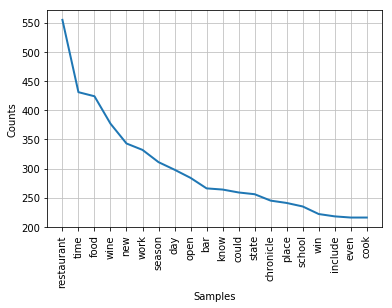

In [131]:
get_freq(all_articles).plot(20, cumulative = False)

__Conclusion__

From the frequency plot of all articles scraped from categories *food*, *sports*, and *business*, we can see that the most frequent words mostly belong to the food category. The reason for this is that there are more articles scraped from the food (129) category compare to sports (90) and business (28). Therefore, it makes sense that the most frequent words overall are mostly from the food category as more articles imply more words, and a higher probability that a certain word would appear, especially when the word is a frequently used word in a certain category, "restaurant" in this case. Therefore, looking at the overall frequency plot is not very helpful to compare to the frequency plot for each individual category. 

The conclusion for individual categories of the SF Chronicle website suggests a big influence on the content of the article and the frequency of certain words by the category. For instance, for sports article, there will be more words related to sports such as "football", "NFL", "player", "coach", etc. Therefore, we can, to some extent, have a very reliable estimation of the category of the articles are in solely based on the word frequency plot because these two variables are closely associated with each other.

In the time period where the articles are scraped and this conclusion is written, the SF Chronicle website, in business, sports, and food categories, covered topics including __football__, __basketball__, __college sports__, __restaurants__, __achohol drinks__, __chicken dishes__, __company news (PG&E in particular)__, and __rental market (Airbnb in particular)__. These are some of the main topics that are covered by news from the SF chronicle based on the word frequency count of each category. There are also many other interesting stories that are embedded in these words, especially words that only appeared in a certain category once, which makes them more specific and easier to make a story out of. 

As mentioned in the previous sections as well as the previous paragraph, the conclusion drawn here is only based on the articles scraped today and these conclusions could be outdated if the articles are drawn from the different date. As one of the intrinsic nature of news, it is constantly updating and any major event could have a huge effect on the news coverage. Therefore, the conclusions here are very fragile and not representative. To get a more general and representative conclusion, this analysis shall be conducted for a longer time interval and eliminate news that is biased to a specific issue like the ones for PG&E in this case. 